#Deteksi Sudut (Corner)

## Harris Corner
Dokumentasi disini https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def harris_corner_detection(image, threshold=0.01):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate Harris corner detection response
    harris_response = cv2.cornerHarris(gray, 2, 3, 0.04)

    # Threshold for corner detection
    harris_response_thresholded = harris_response > threshold * harris_response.max()

    # Mark the corners on the image
    image[harris_response_thresholded] = [0, 0, 255]  # Red color for corners

    return image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image = cv2.imread('/content/drive/MyDrive/SIB/Computer Vision/DAY 4/perumahan.jpeg')

In [ ]:
# Perform Harris corner detection
result_image = harris_corner_detection(image)

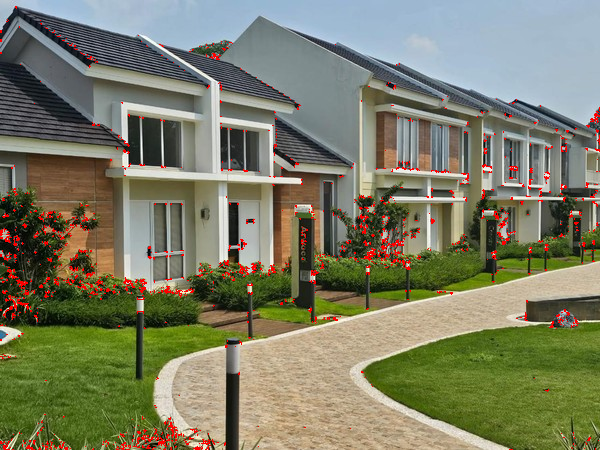

In [ ]:
# Display the result
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

##Shi-Tomasi dengan Good Features to Track (GFTT)
Dokumentsi disini https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html

In [ ]:
def shi_tomasi_corner_detection(image, max_corners=100, quality_level=0.01, min_distance=10):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect corners using Shi-Tomasi method
    corners = cv2.goodFeaturesToTrack(gray, max_corners, quality_level, min_distance)

    # Convert corners to integer coordinates
    corners = np.int0(corners)

    # Draw circles around the corners
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(image, (x, y), 3, (0, 255, 0), -1)

    return image

In [ ]:
# Load image
image = cv2.imread('/content/drive/MyDrive/SIB/Computer Vision/DAY 4/perumahan.jpeg')

In [ ]:
# Perform Shi-Tomasi corner detection
result_image = shi_tomasi_corner_detection(image)

<ipython-input-8-d1ccc2146b8c>:9: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


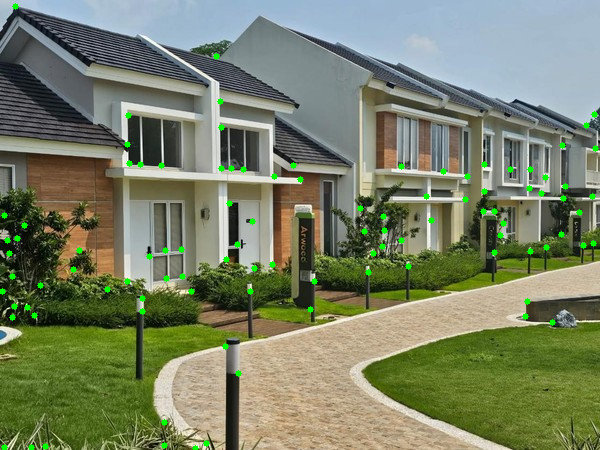

In [ ]:
# Display the result
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Deteksi Keypoints (Feature Detection)
Deteksi ujung (corner detection) dapat digunakan untuk mengidentifikasi fitur pada satu foto dengan baik. Namun demikian, metode ini kurang dapat digunakan dengan baik apabila diperlukan untuk mengidentifikasi titik yang sama pada foto yang berbeda. Kebutuhan ini akan kita jumpai pada saat kita mencari hubungan geometri pada dua buah foto,

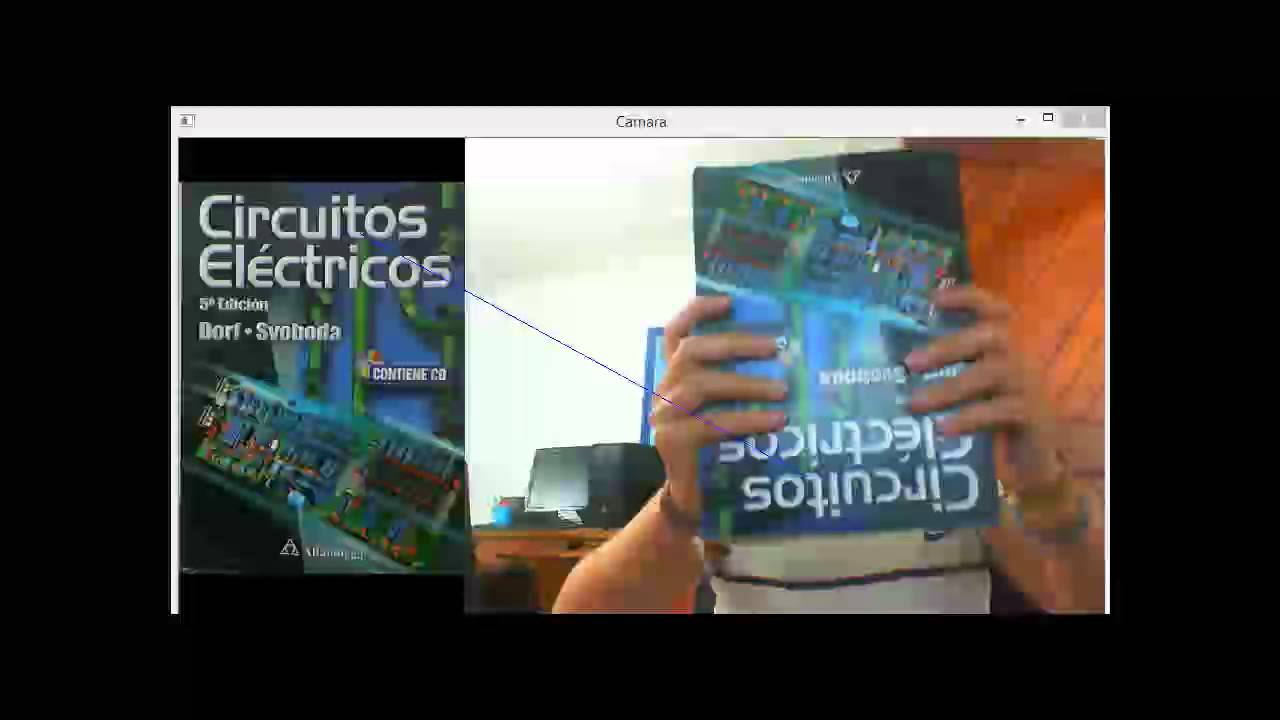

Pada OpenCV, terdapat beberapa fungsi deteksi keypoints, antara lain:

*   [SIFT (Scale-Invariant Feature Transform)](https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html). Merupakan metode yang paling terkenal dan banyak digunakan
*   [SURF (Speeded-Up Robust Feature)](https://docs.opencv.org/3.4/df/dd2/tutorial_py_surf_intro.html).
* [FAST](https://docs.opencv.org/3.4/df/d0c/tutorial_py_fast.html)
* [BRIEF (Binary Robust Independent Elementary Features)](https://docs.opencv.org/3.4/dc/d7d/tutorial_py_brief.html). Merupakan descriptor yang digunakan untuk menghitung hasil deteksi secara lebih efisien. BRIEF seringkali dipasangkan dengan FAST.
* [ORB (Oriented FAST and Rotated BRIEF)](https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html)
* [A-KAZE](https://docs.opencv.org/3.4/db/d70/tutorial_akaze_matching.html). Salah satu feature detector yang banyak digunakan di software SfM Opensource

In [ ]:
def akaze_feature_detection(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize AKAZE detector
    akaze = cv2.AKAZE_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = akaze.detectAndCompute(gray, None)

    # Draw keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

    return image_with_keypoints

In [ ]:
# Load image
image = cv2.imread('/content/drive/MyDrive/SIB/Computer Vision/DAY 4/perumahan.jpeg')

In [ ]:
# Perform AKAZE feature detection
result_image = akaze_feature_detection(image)

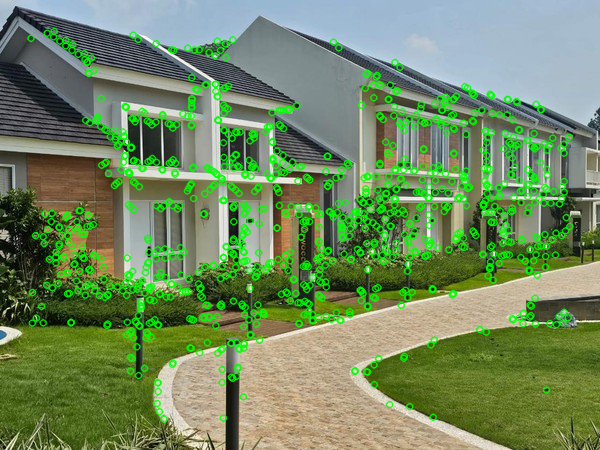

In [ ]:
# Display the result
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Feature Matching

## Feature Matching

Rujukan: https://pysource.com/2018/03/23/feature-matching-brute-force-opencv-3-4-with-python-3-tutorial-26/


Apabila feature detector digunakan untuk mencari titik yang dapat dipasangkan, maka **Feature Matching** digunakan untuk memasangkan masing-masing keypoint yang sudah terdeteksi pada satu citra dengan titik titik yang memiliki kesamaan karakter pada citra lain. Dengan demikian, dapat dikatakan bahwa hasil dari feature matching adalah **Tie-Points** pada sebuah proses fotogrametri.

![alt text](https://docs.opencv.org/3.4/matcher_flann.jpg)

Pada Gambar di atas, lingkaran berwarna merah merupakan fitur (keypoints) yang dideteksi dengan menggunakan *Feature Detector* pada OpenCV, sedangkan garis-garis berwarna hijau merupakan titik-titik yang berhasil dipasangkan berdasarkan atas kesamaan karakteristik (*feature matching*).

Terdapat beberapa algoritma yang berbeda pula pada metode Feature Matching, antara lain:


*   Brute-Force Matcher
*   FLANN

(Panduan untuk keduanya dapat dilihat [di sini](https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html))

Penggunaan kedua model feature matching tersebut perlu disesuaikan dengan algoritma keypoint detector yang digunakan.



In [ ]:
def feature_matching(image1, image2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Initialize AKAZE detector
    akaze = cv2.AKAZE_create()

    # Detect keypoints and compute descriptors for both images
    keypoints1, descriptors1 = akaze.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = akaze.detectAndCompute(gray2, None)

    # Initialize Brute-Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort matches based on their distances
    matches = sorted(matches, key = lambda x:x.distance)

    # Draw top matches
    matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return matched_image

In [ ]:
# Load images
image1 = cv2.imread('/content/drive/MyDrive/SIB/Computer Vision/DAY 4/perumahan.jpeg')
image2 = cv2.imread('/content/drive/MyDrive/SIB/Computer Vision/DAY 4/perumahanCopy.jpeg')

In [ ]:
# Perform feature matching
matched_image = feature_matching(image1, image2)

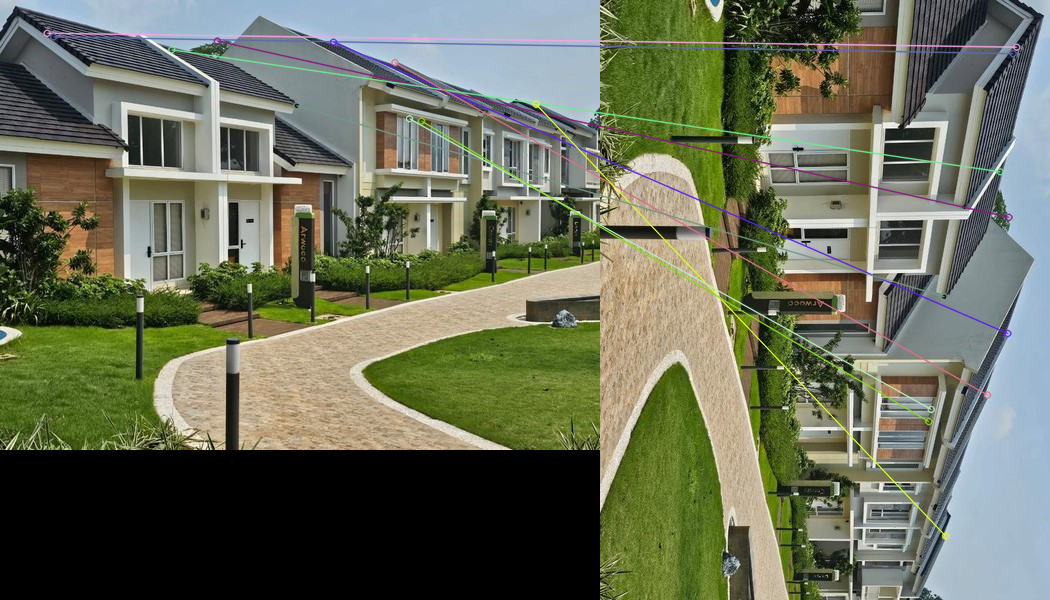

In [ ]:
# Display the result
cv2_imshow(matched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Template Matching

## Panggil Kedua Gambar

In [ ]:
# tampilkan kedua gambar
from matplotlib import pyplot as plt

# panggil dan konversi warna agar sesuai dengan Matplotlib
einstein = cv2.imread('/content/einstein1.png')
einstein =  cv2.cvtColor(einstein, cv2.COLOR_BGR2RGB) # simpan dengan nama yang sama = ditumpuk

# panggil dan konversi warna agar sesuai dengan Matplotlib
solvay = cv2.imread('/content/solvayconference.jpg')
solvay =  cv2.cvtColor(solvay, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(einstein), plt.title('Einstein')
plt.subplot(122),plt.imshow(solvay), plt.title('Solvay Conference 1927')
plt.show()

##Matching dengan Template

hasil metode cv2.TM_CCOEFF : 


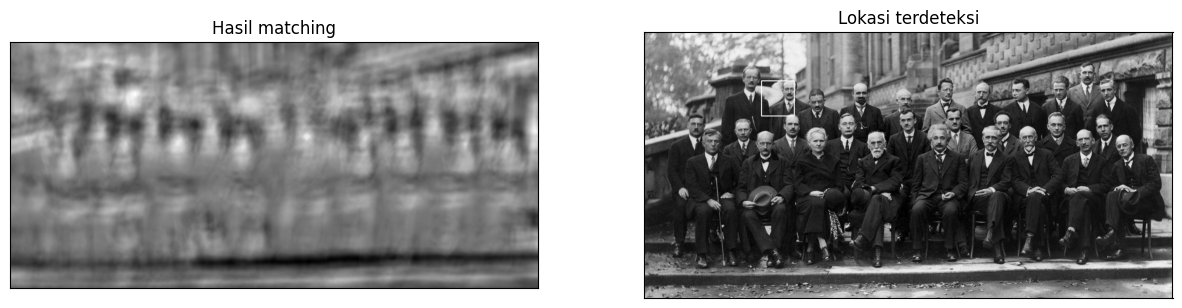

hasil metode cv2.TM_CCOEFF_NORMED : 


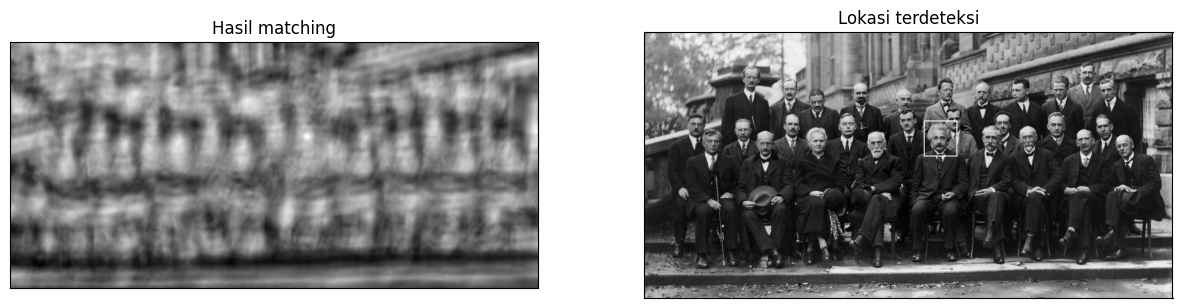

hasil metode cv2.TM_CCORR : 


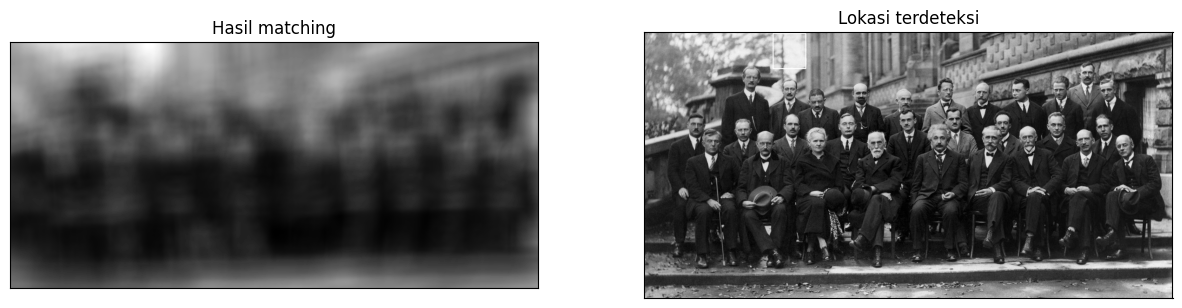

hasil metode cv2.TM_CCORR_NORMED : 


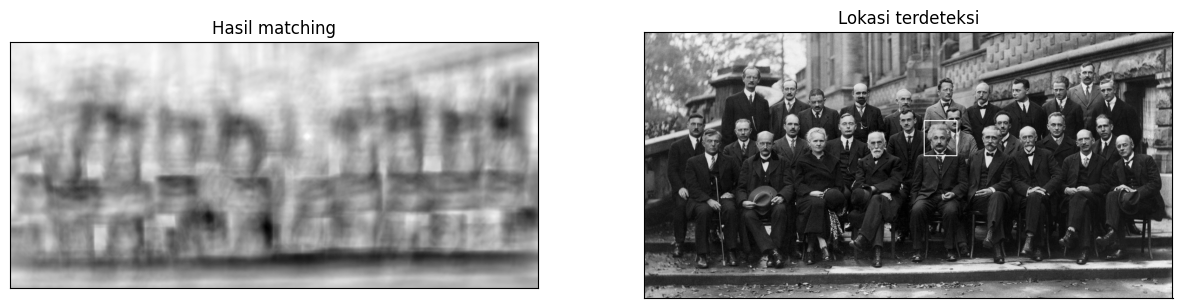

hasil metode cv2.TM_SQDIFF : 


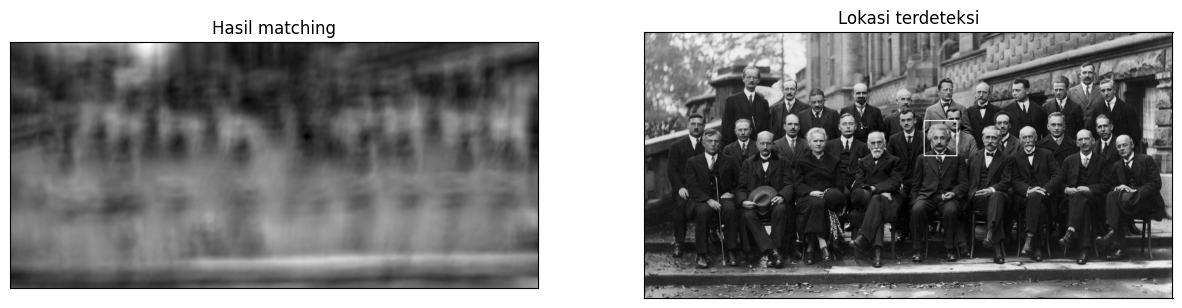

hasil metode cv2.TM_SQDIFF_NORMED : 


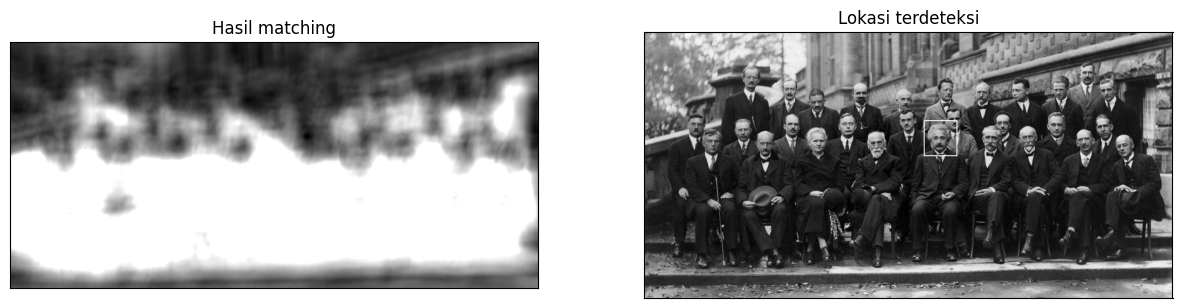

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('solvayconference.jpg',0)
img2 = img.copy()
template = cv2.imread('/content/OnPaste.20240318-141849.png',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (15,15)

for met in methods:
    img = img2.copy()
    method = eval(met)

    # menggunakan template matching
    res = cv2.matchTemplate(img,template,method)

    # mencari ukuran citra template untuk menggambar kotak
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # metode TM_SQDIFF dan TM_SQDIFF_NORMED menggunakan persamaan yang sedikit berbeda
    # sehingga dibuatkan fungsi khusus untuk mengambil nilai minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)



    # buat persegi pada lokasi yang ditemukan
    cv2.rectangle(img, top_left, bottom_right, 255, 2) # 2 adalah ketebalan garis kotak

    print("hasil metode", met, ": " )
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Hasil matching'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Lokasi terdeteksi'), plt.xticks([]), plt.yticks([])


    plt.show()

Hasil Ekstraksi Fitur dan Matching pada video<br>
![](https://raw.githubusercontent.com/magicleap/SuperGluePretrainedNetwork/master/assets/freiburg_matches.gif)